Import necessary libraries and load matches dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

matches = pd.read_csv('Datasets/international_matches.csv')

Describe the dataset

In [3]:
# EDA
print(matches.describe())
print('----------------------------------------')

# Observing total number of rows and columns in the dataset
print(matches.head())
print(matches.tail())
print(matches.shape)  # (23921, 25)
print('----------------------------------------')

# Observing all the columns in the dataset
print(list(matches))
print('----------------------------------------')

       home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
count         23921.000000         23921.000000                 23921.000000   
mean             77.854688            80.797375                   323.401488   
std              52.355225            53.232902                   500.825725   
min               1.000000             1.000000                     0.000000   
25%              33.000000            36.000000                     0.000000   
50%              71.000000            73.000000                     0.000000   
75%             115.000000           119.000000                   547.000000   
max             211.000000           211.000000                  2164.000000   

       away_team_total_fifa_points  home_team_score  away_team_score  \
count                 23921.000000     23921.000000     23921.000000   
mean                    315.453576         1.609214         1.068266   
std                     490.944273         1.630127         1.2

Give ids to team names

In [4]:
team_name = {}
index = 0
for idx, row in matches.iterrows():
    name = row['home_team']
    if name not in team_name.keys():
        team_name[name] = index
        index += 1

    name = row['away_team']
    if name not in team_name.keys():
        team_name[name] = index
        index += 1
team_name

{'Bolivia': 0,
 'Uruguay': 1,
 'Brazil': 2,
 'Mexico': 3,
 'Ecuador': 4,
 'Venezuela': 5,
 'Guinea': 6,
 'Sierra Leone': 7,
 'Paraguay': 8,
 'Argentina': 9,
 'Peru': 10,
 'Colombia': 11,
 'Zimbabwe': 12,
 'Eswatini': 13,
 'Faroe Islands': 14,
 'Norway': 15,
 'Sweden': 16,
 'Switzerland': 17,
 'Australia': 18,
 'Canada': 19,
 'Congo': 20,
 'France': 21,
 'Austria': 22,
 'Finland': 23,
 'Denmark': 24,
 'Lithuania': 25,
 'Iceland': 26,
 'USA': 27,
 'Estonia': 28,
 'Portugal': 29,
 'Albania': 30,
 'Bulgaria': 31,
 'England': 32,
 'Poland': 33,
 'Romania': 34,
 'Hungary': 35,
 'Russia': 36,
 'Luxembourg': 37,
 'Republic of Ireland': 38,
 'Northern Ireland': 39,
 'Latvia': 40,
 'Scotland': 41,
 'Spain': 42,
 'Chile': 43,
 'Morocco': 44,
 'Mali': 45,
 'Saudi Arabia': 46,
 'Thailand': 47,
 'Senegal': 48,
 'Italy': 49,
 'Cameroon': 50,
 'Israel': 51,
 'San Marino': 52,
 'Netherlands': 53,
 'Tunisia': 54,
 'Germany': 55,
 'Costa Rica': 56,
 'Korea Republic': 57,
 'Nigeria': 58,
 "Côte d'Ivoire":

Remove missing values

In [5]:
print(matches[matches["home_team"] == "Qatar"])

             date home_team             away_team home_team_continent  \
188    1994-01-25     Qatar               Finland                Asia   
192    1994-01-27     Qatar               Finland                Asia   
508    1994-09-10     Qatar                  Oman                Asia   
515    1994-09-16     Qatar                 Yemen                Asia   
577    1994-11-09     Qatar                  Oman                Asia   
...           ...       ...                   ...                 ...   
23338  2021-12-10     Qatar  United Arab Emirates                Asia   
23343  2021-12-15     Qatar               Algeria                Asia   
23344  2021-12-18     Qatar                 Egypt                Asia   
23550  2022-03-26     Qatar              Bulgaria                Asia   
23615  2022-03-29     Qatar              Slovenia                Asia   

      away_team_continent  home_team_fifa_rank  away_team_fifa_rank  \
188                Europe                   54      

In [6]:
# Finding Missing Values
print(matches.isnull().sum())
print('----------------------------------------')

# Drop all rows with missing values
matches = matches.dropna()
print(matches.shape)  # (4303, 25)

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64
------------

In [7]:
print(matches[matches["home_team"] == "Qatar"])

Empty DataFrame
Columns: [date, home_team, away_team, home_team_continent, away_team_continent, home_team_fifa_rank, away_team_fifa_rank, home_team_total_fifa_points, away_team_total_fifa_points, home_team_score, away_team_score, tournament, city, country, neutral_location, shoot_out, home_team_result, home_team_goalkeeper_score, away_team_goalkeeper_score, home_team_mean_defense_score, home_team_mean_offense_score, home_team_mean_midfield_score, away_team_mean_defense_score, away_team_mean_offense_score, away_team_mean_midfield_score]
Index: []

[0 rows x 25 columns]


In [8]:
wins = matches[matches["home_team_result"] == "Win"].count()
loses = matches[matches["home_team_result"] == "Lose"].count()
draws = matches[matches["home_team_result"] == "Draw"].count()

print(wins, loses, draws)

date                             1950
home_team                        1950
away_team                        1950
home_team_continent              1950
away_team_continent              1950
home_team_fifa_rank              1950
away_team_fifa_rank              1950
home_team_total_fifa_points      1950
away_team_total_fifa_points      1950
home_team_score                  1950
away_team_score                  1950
tournament                       1950
city                             1950
country                          1950
neutral_location                 1950
shoot_out                        1950
home_team_result                 1950
home_team_goalkeeper_score       1950
away_team_goalkeeper_score       1950
home_team_mean_defense_score     1950
home_team_mean_offense_score     1950
home_team_mean_midfield_score    1950
away_team_mean_defense_score     1950
away_team_mean_offense_score     1950
away_team_mean_midfield_score    1950
dtype: int64 date                             1263

Find out how many matches each continent wins in contrast to their total matches played

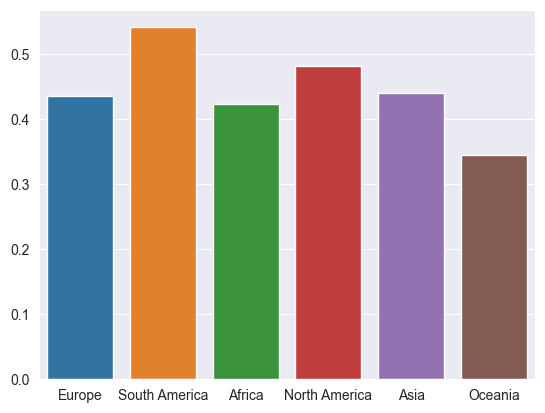

In [9]:
continent_rows = matches["home_team_continent"]
continent_match_count = continent_rows.value_counts()

# find how many games each continent won
continent_wins = matches[matches["home_team_result"] == "Win"]
continent_wins = continent_wins["home_team_continent"].value_counts()

# plot the number of wins for each continent divided by the number of games played
continent_wins = continent_wins / continent_match_count
sns.barplot(x=continent_wins.index, y=continent_wins.values)
plt.show()

Study which countries have the best offense, defense, midfield and goalkeeper scores

In [10]:
offense = matches.groupby("home_team")["home_team_mean_offense_score"].mean().sort_values(ascending=False)
midfield = matches.groupby("home_team")["home_team_mean_midfield_score"].mean().sort_values(ascending=False)
defense = matches.groupby("home_team")["home_team_mean_defense_score"].mean().sort_values(ascending=False)
goalkeeper = matches.groupby("home_team")["home_team_goalkeeper_score"].mean().sort_values(ascending=False)

# find the mean of all categories
overall = ((offense + midfield + defense + goalkeeper) / 4).sort_values(ascending=False)

# make a table with 5 rows and a column for each category
table = pd.DataFrame(index=range(1, 6), columns=["offense", "midfield", "defense", "goalkeeper", "overall"])

# fill the table with the mean values for each category
table["offense"] = offense.index[:5]
table["midfield"] = midfield.index[:5]
table["defense"] = defense.index[:5]
table["goalkeeper"] = goalkeeper.index[:5]
table["overall"] = overall.index[:5]

table

,offense,midfield,defense,goalkeeper,overall
1,Argentina,Spain,Brazil,Germany,Spain
2,Brazil,France,Spain,Spain,Germany
3,Spain,Germany,Italy,Italy,Brazil
4,France,Brazil,Germany,France,France
5,Netherlands,England,England,Brazil,Italy


Import sklearn libraries

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.model_selection import GridSearchCV


Give ids to tournament names

In [12]:
tournament_names = {}
index = 0
for idx, row in matches.iterrows():
    name = row['tournament']
    if name not in tournament_names.keys():
        tournament_names[name] = index
        index += 1

    name = row['tournament']
    if name not in tournament_names.keys():
        tournament_names[name] = index
        index += 1

tournament_names

{'Friendly': 0,
 'FIFA World Cup qualification': 1,
 "King's Cup": 2,
 'Confederations Cup': 3,
 'Gold Cup': 4,
 'EAFF Championship': 5,
 'African Cup of Nations': 6,
 'Lunar New Year Cup': 7,
 'Cyprus International Tournament': 8,
 'Kirin Cup': 9,
 'FIFA World Cup': 10,
 'UEFA Euro qualification': 11,
 'Copa América': 12,
 'UEFA Euro': 13,
 'African Cup of Nations qualification': 14,
 'AFC Asian Cup': 15,
 'Nations Cup': 16,
 'Copa Confraternidad': 17,
 'Superclásico de las Américas': 18,
 'Copa del Pacífico': 19,
 'Nehru Cup': 20,
 'Kirin Challenge Cup': 21,
 'African Nations Championship': 22,
 'OSN Cup': 23,
 'Intercontinental Cup': 24,
 'UEFA Nations League': 25,
 'African Nations Championship qualification': 26,
 'CONCACAF Nations League': 27,
 'COSAFA Cup': 28,
 'Arab Cup': 29,
 'CONMEBOL–UEFA Cup of Champions': 30}

Add Winner column

In [13]:
# Winner of particular match
# For Home team win value is 1, Away team win value is 2 and for Draw value is 0
matches['Winner'] = '-'

def match_winner(df):
    if int(df['home_team_score']) == int(df['away_team_score']):
        df['Winner'] = 0
    elif int(df['home_team_score']) > int(df['away_team_score']):
        df['Winner'] = 1
    else:
        df['Winner'] = 2

    return df

matches = matches.apply(match_winner, axis = 1)

Drop irrelevant columns

In [14]:
matches = matches.drop(columns = ['home_team_total_fifa_points', 'away_team_total_fifa_points', 'home_team_continent', 'away_team_continent', 'country', 'city', 'shoot_out', 'home_team_result', 'home_team_score', 'away_team_score'])

Replace strings with ids

In [15]:
# Replace Team names by corresponding id:
def replace_name(df):
    df['home_team'] = team_name[df['home_team']]
    df['away_team'] = team_name[df['away_team']]

    return df

matches = matches.apply(replace_name, axis = 1)

In [16]:
# Replace Tournament names by corresponding id:
def replace_tournament_name(df):
    df['tournament'] = tournament_names[df['tournament']]

    return df

matches = matches.apply(replace_tournament_name, axis = 1)

In [17]:
# replace date with epoch
matches['date'] = pd.to_datetime(matches['date'])
matches['date'] = matches['date'].astype(np.int64) // 10 ** 9


Prepare data for training and testing

In [18]:
X = matches.iloc[:, :-1].values
y = matches.iloc[:, -1].values

_X = X.copy()
_X[:, 1] = X[:, 2]
_X[:, 2] = X[:, 1]
_X[:, 3] = X[:, 4]
_X[:, 4] = X[:, 3]
_X[:, 7] = X[:, 8]
_X[:, 8] = X[:, 7]
_X[:, 9] = X[:, 12]
_X[:, 12] = X[:, 9]
_X[:, 10] = X[:, 13]
_X[:, 13] = X[:, 10]
_X[:, 11] = X[:, 14]
_X[:, 14] = X[:, 11]

_y = y.copy()

for i in range(len(_y)):
  if _y[i]==1:
    _y[i] = 2
  elif _y[i] == 2:
    _y[i] = 1

X = np.concatenate((X,_X), axis= 0)

y = np.concatenate((y,_y))


print(matches.iloc[:, :-1].columns)


X = np.array(X, dtype = 'f')
y = np.array(y, dtype = 'f')


from sklearn.preprocessing import LabelEncoder
LabelEncoder_res=LabelEncoder()
y=LabelEncoder_res.fit_transform(y)

X, y = shuffle(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Scaling of Data:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

print('Draws: ', len(y[y==0]))
print('Wins: ', len(y[y==1]))
print('Loses:', len(y[y==2]))

# make a table with 5 rows and a column for each category
table = pd.DataFrame(index=range(len(X_train)), columns=matches.iloc[:, :-1].columns, data=X_train)
table


Index(['date', 'home_team', 'away_team', 'home_team_fifa_rank',
       'away_team_fifa_rank', 'tournament', 'neutral_location',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')
Draws:  2312
Wins:  3147
Loses: 3147


,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,tournament,neutral_location,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1.393978e+09,68.0,26.0,51.0,48.0,0.0,0.0,72.0,57.0,74.199997,69.699997,79.500000,67.199997,73.300003,71.800003
1,1.277424e+09,43.0,42.0,18.0,2.0,10.0,1.0,75.0,90.0,74.199997,77.300003,78.500000,85.000000,85.300003,87.000000
2,1.350000e+09,67.0,172.0,10.0,29.0,1.0,0.0,73.0,80.0,77.199997,75.000000,74.199997,72.000000,75.300003,76.500000
3,1.289952e+09,34.0,49.0,52.0,14.0,0.0,1.0,75.0,85.0,76.000000,74.000000,72.500000,81.199997,83.300003,81.000000
4,1.464739e+09,15.0,26.0,49.0,35.0,0.0,0.0,73.0,65.0,73.199997,74.300003,74.800003,70.000000,73.000000,74.199997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,1.283818e+09,23.0,53.0,51.0,2.0,11.0,0.0,79.0,83.0,73.800003,71.300003,72.500000,77.000000,83.699997,83.500000
6450,1.283818e+09,204.0,31.0,73.0,43.0,11.0,0.0,64.0,77.0,69.500000,79.300003,68.800003,71.199997,75.300003,75.000000
6451,1.234310e+09,15.0,55.0,56.0,2.0,0.0,0.0,73.0,85.0,77.500000,78.000000,76.199997,83.199997,83.300003,82.500000
6452,1.412813e+09,105.0,17.0,53.0,10.0,11.0,0.0,83.0,80.0,71.500000,75.000000,72.500000,76.500000,74.699997,79.199997


Import keras libraries

## Method 1: Logistic Regression

In [19]:
np.random.seed(69)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
LR = LogisticRegression(random_state = 69, max_iter=1000)
LR.fit(X_train, y_train)
score_train_acc = LR.score(X_train, y_train)
score_test_acc = LR.score(X_test, y_test)
print(score_train_acc) # 53
print(score_test_acc) # 54
y_pred_LR = LR.predict(X_test)
print(classification_report(y_test, y_pred_LR))
print(confusion_matrix(y_test, y_pred_LR, labels=range(3)))

0.36550976138828634
0.36617100371747213
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       563
           1       0.00      0.00      0.00       801
           2       0.37      1.00      0.54       788

    accuracy                           0.37      2152
   macro avg       0.12      0.33      0.18      2152
weighted avg       0.13      0.37      0.20      2152

[[  0   0 563]
 [  0   0 801]
 [  0   0 788]]


C:\Users\tomib\Projects\Faculty\ml\fifa-2022-predictor\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tomib\Projects\Faculty\ml\fifa-2022-predictor\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tomib\Projects\Faculty\ml\fifa-2022-predictor\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

## Method 2: SGDC Classifier

In [20]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(loss = 'log_loss', penalty = 'elasticnet')
SGD.fit(X_train, y_train)
score_train_acc = SGD.score(X_train, y_train)
score_test_acc = SGD.score(X_test, y_test)
print(score_train_acc) # 50
print(score_test_acc)  # 50
y_pred_SGD = SGD.predict(X_test)
print(classification_report(y_test, y_pred_SGD))
print(confusion_matrix(y_test, y_pred_SGD, labels=range(3)))

0.3634955066625349
0.3722118959107807
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       563
           1       0.37      1.00      0.54       801
           2       0.00      0.00      0.00       788

    accuracy                           0.37      2152
   macro avg       0.12      0.33      0.18      2152
weighted avg       0.14      0.37      0.20      2152

[[  0 563   0]
 [  0 801   0]
 [  0 788   0]]


C:\Users\tomib\Projects\Faculty\ml\fifa-2022-predictor\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tomib\Projects\Faculty\ml\fifa-2022-predictor\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tomib\Projects\Faculty\ml\fifa-2022-predictor\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

## Method 3: SVM

In [21]:
from sklearn.svm import SVC
svm_model = SVC()
parameters = {'C' : [ 0.1, 0.001, 1]}
svm_model = GridSearchCV(svm_model, param_grid= parameters ,cv=5)
svm_model.fit(X_train, y_train)
score_train_acc = svm_model.score(X_train, y_train)
score_test_acc = svm_model.score(X_test, y_test)
print(score_train_acc) # 57
print(score_test_acc)  # 53
y_pred_SVM = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_SVM))
print(confusion_matrix(y_test, y_pred_SVM, labels=range(3)))

0.36550976138828634
0.36617100371747213
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       563
           1       0.00      0.00      0.00       801
           2       0.37      1.00      0.54       788

    accuracy                           0.37      2152
   macro avg       0.12      0.33      0.18      2152
weighted avg       0.13      0.37      0.20      2152

[[  0   0 563]
 [  0   0 801]
 [  0   0 788]]


C:\Users\tomib\Projects\Faculty\ml\fifa-2022-predictor\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tomib\Projects\Faculty\ml\fifa-2022-predictor\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tomib\Projects\Faculty\ml\fifa-2022-predictor\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

## Method 4: Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)
score_train_acc = dc.score(X_train, y_train)
score_test_acc = dc.score(X_test, y_test)
print(score_train_acc) # 100
print(score_test_acc)  # 42
y_pred_dc = dc.predict(X_test)
print(classification_report(y_test, y_pred_dc))
print(confusion_matrix(y_test, y_pred_dc, labels=range(3)))

1.0
0.40055762081784385
              precision    recall  f1-score   support

           0       0.26      0.29      0.28       563
           1       0.44      0.42      0.43       801
           2       0.47      0.46      0.46       788

    accuracy                           0.40      2152
   macro avg       0.39      0.39      0.39      2152
weighted avg       0.41      0.40      0.40      2152

[[164 212 187]
 [238 334 229]
 [219 205 364]]


## Method 5: KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights = 'uniform', algorithm='auto')
knn.fit(X_train, y_train)
score_train_acc = knn.score(X_train, y_train)
score_test_acc = knn.score(X_test, y_test)
print(score_train_acc) # 63
print(score_test_acc)  # 44
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn, labels=range(3)))

0.5638363805392005
0.33178438661710036
              precision    recall  f1-score   support

           0       0.35      0.53      0.42       563
           1       0.33      0.35      0.34       801
           2       0.30      0.18      0.22       788

    accuracy                           0.33      2152
   macro avg       0.33      0.35      0.33      2152
weighted avg       0.32      0.33      0.32      2152

[[296 181  86]
 [279 278 244]
 [276 372 140]]


## Method 6: Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
score_train_acc = nb.score(X_train, y_train)
score_test_acc = nb.score(X_test, y_test)
print(score_train_acc) # 52
print(score_test_acc)  # 51
y_pred_nb = nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb, labels=range(3)))

0.3684536721413077
0.35734200743494426
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       563
           1       0.35      0.34      0.35       801
           2       0.36      0.63      0.46       788

    accuracy                           0.36      2152
   macro avg       0.24      0.32      0.27      2152
weighted avg       0.26      0.36      0.30      2152

[[  0 212 351]
 [  0 274 527]
 [  0 293 495]]


C:\Users\tomib\Projects\Faculty\ml\fifa-2022-predictor\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tomib\Projects\Faculty\ml\fifa-2022-predictor\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tomib\Projects\Faculty\ml\fifa-2022-predictor\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

## Method 7: Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(n_estimators=100)
rc.fit(X_train, y_train)
score_train_acc = rc.score(X_train, y_train)
score_test_acc = rc.score(X_test, y_test)
print(score_train_acc) # 100
print(score_test_acc)  # 52
y_pred_rc = rc.predict(X_test)
print(classification_report(y_test, y_pred_rc))
print(confusion_matrix(y_test, y_pred_rc, labels=range(3)))

1.0
0.49117100371747213
              precision    recall  f1-score   support

           0       0.31      0.17      0.22       563
           1       0.53      0.59      0.56       801
           2       0.52      0.62      0.56       788

    accuracy                           0.49      2152
   macro avg       0.45      0.46      0.45      2152
weighted avg       0.47      0.49      0.47      2152

[[ 96 227 240]
 [116 476 209]
 [101 202 485]]


## Method 8: Bagging Classifier

In [26]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=100)
bc.fit(X_train, y_train)
score_train_acc = bc.score(X_train, y_train)
score_test_acc = bc.score(X_test, y_test)
print(score_train_acc) # 100
print(score_test_acc)  # 50
y_pred_bc = bc.predict(X_test)
print(classification_report(y_test, y_pred_bc))
print(confusion_matrix(y_test, y_pred_bc, labels=range(3)))

1.0
0.4758364312267658
              precision    recall  f1-score   support

           0       0.30      0.19      0.23       563
           1       0.51      0.56      0.53       801
           2       0.51      0.60      0.55       788

    accuracy                           0.48      2152
   macro avg       0.44      0.45      0.44      2152
weighted avg       0.45      0.48      0.46      2152

[[105 227 231]
 [134 449 218]
 [115 203 470]]


## Method 9: Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbc.fit(X_train, y_train)
score_train_acc = gbc.score(X_train, y_train)
score_test_acc = gbc.score(X_test, y_test)
print(score_train_acc) # 63
print(score_test_acc)  # 53
y_pred_gbc = gbc.predict(X_test)
print(classification_report(y_test, y_pred_gbc))
print(confusion_matrix(y_test, y_pred_gbc, labels=range(3)))

0.575147195537651
0.5195167286245354
              precision    recall  f1-score   support

           0       0.35      0.08      0.13       563
           1       0.53      0.66      0.59       801
           2       0.53      0.69      0.60       788

    accuracy                           0.52      2152
   macro avg       0.47      0.48      0.44      2152
weighted avg       0.48      0.52      0.47      2152

[[ 46 266 251]
 [ 45 532 224]
 [ 41 207 540]]


## Method 10: XGBoost

In [28]:
import xgboost as xgb
XGB = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.4, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=1,
       n_estimators=40, n_jobs=1, nthread=None, objective='multi:softprob',
       random_state=0, reg_alpha=1e-05, reg_lambda=1,
       seed=2, subsample=0.8)
XGB.fit(X_train, y_train)
score_train_acc = XGB.score(X_train, y_train)
score_test_acc = XGB.score(X_test, y_test)
print(score_train_acc) # 55
print(score_test_acc)  # 51
y_pred_XGB = XGB.predict(X_test)
print(classification_report(y_test, y_pred_XGB))
print(confusion_matrix(y_test, y_pred_XGB, labels=range(3)))

0.5226216299969011
0.5181226765799256
              precision    recall  f1-score   support

           0       0.50      0.00      0.01       563
           1       0.51      0.70      0.59       801
           2       0.52      0.70      0.60       788

    accuracy                           0.52      2152
   macro avg       0.51      0.47      0.40      2152
weighted avg       0.51      0.52      0.44      2152

[[  2 297 264]
 [  1 558 242]
 [  1 232 555]]


In [141]:
import time

def prediction(team1, team2):
  id_home = team_name[team1['name']]
  id_away = team_name[team2['name']]

  date = time.time()
  tournament = tournament_names.get('FIFA World Cup')
  neutral_location =  1 if team1['name'] != 'Qatar' else 0

  t = np.array([date, id_home, id_away, team1['rank'], team2['rank'],
               tournament, neutral_location,
               team1['goalkeeper'], team2['goalkeeper'],
               team1['defence'], team1['offense'],
               team1['midfield'], team2['defence'],
               team2['offense'], team2['midfield']]).astype('float64')
  t = np.reshape(t, (1,-1))
  y_rc = XGB.predict(t)
  odds = XGB.predict_proba(t)[0]
  print(odds)
  if abs(odds[1] - odds[2]) < 0.01:
      return 'Draw'
  result = team1['name']
  if y_rc == 0:
    result = 'Draw'
  elif y_rc == 2:
    result = team2['name']
  return result

prediction({
    'name': "Qatar",
    'rank': 50,
    'goalkeeper': 68,
    'defence': 68,
    'midfield': 70,
    'offense': 71,
}, {
    'name': "Argentina",
    'rank': 3,
    'goalkeeper': 84,
    'defence': 81,
    'midfield': 82,
    'offense': 86,
})

[0.31413597 0.28436655 0.40149742]


'Argentina'

## Predict World Champion
### Groups

In [142]:
# Group A
qatar = {
    'name': "Qatar",
    'rank': 50,
    'goalkeeper': 68,
    'defence': 68,
    'midfield': 70,
    'offense': 71,
}
ecuador = {
    'name': "Ecuador",
    'rank': 44,
    'goalkeeper': 74,
    'defence': 75,
    'midfield': 72,
    'offense': 74,
}
senegal = {
    'name': "Senegal",
    'rank': 18,
    'goalkeeper': 69,
    'defence': 76,
    'midfield': 77,
    'offense': 77,
}
netherlands = {
    'name': "Netherlands",
    'rank': 8,
    'goalkeeper': 79,
    'defence': 83,
    'midfield': 81,
    'offense': 82,
}

# Group B
england = {
    'name': "England",
    'rank': 5,
    'goalkeeper': 82,
    'defence': 83,
    'midfield': 83,
    'offense': 85,
}
iran = {
    'name': "IR Iran",
    'rank': 20,
    'goalkeeper': 75,
    'defence': 71,
    'midfield': 71,
    'offense': 76,
}
usa = {
    'name': "USA",
    'rank': 16,
    'goalkeeper': 77,
    'defence': 74,
    'midfield': 76,
    'offense': 74,
}
wales = {
    'name': "Wales",
    'rank': 19,
    'goalkeeper': 75,
    'defence': 73,
    'midfield': 74,
    'offense': 74,
}

# Group C
argentina = {
    'name': "Argentina",
    'rank': 3,
    'goalkeeper': 84,
    'defence': 81,
    'midfield': 82,
    'offense': 86,
}
saudi_arabia = {
    'name': "Saudi Arabia",
    'rank': 51,
    'goalkeeper': 70,
    'defence': 73,
    'midfield': 72,
    'offense': 73,
}
mexico = {
    'name': "Mexico",
    'rank': 13,
    'goalkeeper': 80,
    'defence': 76,
    'midfield': 77,
    'offense': 79,
}
poland = {
    'name': "Poland",
    'rank': 26,
    'goalkeeper': 86,
    'defence': 75,
    'midfield': 76,
    'offense': 81,
}

# Group D
france = {
    'name': "France",
    'rank': 4,
    'goalkeeper': 87,
    'defence': 83,
    'midfield':85 ,
    'offense': 88,
}
australia = {
    'name': "Australia",
    'rank': 38,
    'goalkeeper': 78,
    'defence': 70,
    'midfield': 72,
    'offense': 72,
}
denmark = {
    'name': "Denmark",
    'rank': 10,
    'goalkeeper': 83,
    'defence': 78,
    'midfield': 82,
    'offense': 77,
}
tunisia = {
    'name': "Tunisia",
    'rank': 30,
    'goalkeeper': 68,
    'defence': 71,
    'midfield': 71,
    'offense': 75,
}

# Group E
spain = {
    'name': "Spain",
    'rank': 7,
    'goalkeeper': 83,
    'defence': 83,
    'midfield': 84,
    'offense': 82,
}
costaRica = {
    'name': "Costa Rica",
    'rank': 31,
    'goalkeeper': 86,
    'defence': 73,
    'midfield': 73,
    'offense': 69,
}
germany = {
    'name': "Germany",
    'rank': 11,
    'goalkeeper': 90,
    'defence': 82,
    'midfield': 85,
    'offense': 82,
}
japan = {
    'name': "Japan",
    'rank': 24,
    'goalkeeper': 72,
    'defence': 74,
    'midfield': 77,
    'offense': 76,
}

# Group F
belgium = {
    'name': "Belgium",
    'rank': 2,
    'goalkeeper': 90,
    'defence': 80,
    'midfield': 80,
    'offense': 86,
}
canada = {
    'name': "Canada",
    'rank': 41,
    'goalkeeper': 77,
    'defence': 70,
    'midfield': 73,
    'offense': 75,
}
morocco = {
    'name': "Morocco",
    'rank': 2,
    'goalkeeper': 84,
    'defence': 78,
    'midfield': 74,
    'offense': 74,
}
croatia = {
    'name': "Croatia",
    'rank': 12,
    'goalkeeper': 80,
    'defence': 78,
    'midfield': 83,
    'offense': 80,
}

# Group G
brazil = {
    'name': "Brazil",
    'rank': 1,
    'goalkeeper': 82,
    'defence': 80,
    'midfield': 80,
    'offense': 81,
}
serbia = {
    'name': "Serbia",
    'rank': 21,
    'goalkeeper': 74,
    'defence': 76,
    'midfield': 79,
    'offense': 75,
}
switzerland = {
    'name': "Switzerland",
    'rank': 15,
    'goalkeeper': 84,
    'defence': 75,
    'midfield': 78,
    'offense': 75,
}
cameroon = {
    'name': "Cameroon",
    'rank': 43,
    'goalkeeper': 67,
    'defence': 70,
    'midfield': 71,
    'offense': 72,
}

# Group H
portugal = {
    'name': "Portugal",
    'rank': 9,
    'goalkeeper': 82,
    'defence': 84,
    'midfield': 84,
    'offense': 84,
}
ghana = {
    'name': "Ghana",
    'rank': 61,
    'goalkeeper': 70,
    'defence': 73,
    'midfield': 76,
    'offense': 73,
}
uruguay = {
    'name': "Uruguay",
    'rank': 14,
    'goalkeeper': 80,
    'defence': 78,
    'midfield': 79,
    'offense': 79,
}
korea = {
    'name': "Korea Republic",
    'rank': 28,
    'goalkeeper': 69,
    'defence': 70,
    'midfield': 74,
    'offense': 74,
}



### Group Stage

In [143]:
prediction(qatar, ecuador)
# Ecuador ✔

[0.3143354  0.3367357  0.34892884]


'Ecuador'

In [144]:
prediction(england, iran)
# England ✔

[0.31538025 0.40614957 0.27847016]


'England'

In [145]:
prediction(senegal, netherlands)
# Netherlands ✔

[0.32317415 0.29301572 0.38381007]


'Netherlands'

In [146]:
prediction(usa, wales)
# Draw ✔

[0.31782323 0.34455407 0.3376227 ]


'Draw'

In [147]:
prediction(argentina, saudi_arabia)
# Argentina ❌ (Saudi Arabia)

[0.31313965 0.3972026  0.28965768]


'Argentina'

In [148]:
prediction(denmark, tunisia)
# Denmark ❌ (Draw)

[0.3161321  0.37841344 0.30545446]


'Denmark'

In [149]:
prediction(mexico, poland)
# Mexico ❌ (Draw)

[0.3178255  0.34830073 0.3338738 ]


'Mexico'

In [150]:
prediction(france, australia)
# France ✔

[0.31053615 0.4144877  0.27497622]


'France'

In [151]:
prediction(morocco, croatia)
# Croatia ❌ (Draw)

[0.32052004 0.29505742 0.38442254]


'Croatia'

In [152]:
prediction(germany, japan)
# Germany ❌ (Japan)

[0.31289208 0.4068876  0.28022036]


'Germany'

In [153]:
prediction(spain, croatia)
# Spain ✔

[0.32220417 0.36474663 0.31304923]


'Spain'

In [154]:
prediction(belgium, canada)
# Belgium ✔

[0.3092391  0.3892226  0.30153832]


'Belgium'

In [155]:
prediction(switzerland, cameroon)
# Switzerland ✔

[0.31855908 0.36581713 0.31562376]


'Switzerland'

In [156]:
prediction(uruguay, korea)
# Uruguay ❌ (Draw)

[0.31298724 0.37837884 0.30863392]


'Uruguay'

In [157]:
prediction(portugal, ghana)
# Portugal ✔

[0.315108   0.40989763 0.27499434]


'Portugal'

In [158]:
prediction(brazil, serbia)
# Brazil ✔

[0.31174487 0.37201968 0.3162354 ]


'Brazil'

In [159]:
prediction(wales, iran)
# Wales ❌ (Draw)

[0.31666628 0.34765705 0.33567667]


'Wales'

In [160]:
prediction(qatar, senegal)
# Senegal ✔

[0.3144089  0.31019896 0.37539214]


'Senegal'

In [161]:
prediction(netherlands, ecuador)

[0.31005478 0.39536518 0.29458004]


'Netherlands'

In [162]:
prediction(england, usa)

[0.31433216 0.4072838  0.27838403]


'England'

# Para el final
SHAPLEY VALUES -> Libreria que te calcula eso (explica la predicción)
EL fixture terminado
HYPER OPT -> prueba muchos parametros -> bayesian optimization